# Static Analysis of LouiesBurner Code

Jensen Holm

In [1]:
import polars as pl
from plotnine import *

The `static_analysis.json` file was generated using the command 

```bash
pylint --output-format=json:static_analysis.json ./LouiesBurner
```

In [2]:
static_analysis_df = pl.read_json("static_analysis.json")

# here is a sample of 5 of the rows
(static_analysis_df
    .sample(5, seed=42))

type,module,obj,line,column,endLine,endColumn,path,symbol,message,message-id
str,str,str,i64,i64,i64,i64,str,str,str,str
"""convention""","""wmns_soccer""","""""",1,0,null,null,"""wmns_soccer.py""","""missing-module-docstring""","""Missing module docstring""","""C0114"""
"""convention""","""LouiesBurner.schedule""","""""",1,0,null,null,"""LouiesBurner/schedule.py""","""missing-module-docstring""","""Missing module docstring""","""C0114"""
"""warning""","""LouiesBurner.scraping""","""""",199,0,201,3,"""LouiesBurner/scraping.py""","""pointless-string-statement""","""String statement has no effect""","""W0105"""
"""convention""","""LouiesBurner.scraping""","""""",242,0,null,null,"""LouiesBurner/scraping.py""","""line-too-long""","""Line too long (123/100)""","""C0301"""
"""convention""","""LouiesBurner.schedule""","""""",22,44,null,null,"""LouiesBurner/schedule.py""","""trailing-whitespace""","""Trailing whitespace""","""C0303"""


It appears that we have 29 issues with our code as pointed out with pylint

In [3]:
len(static_analysis_df)

29

## Types of pylint Issues

In [4]:
static_analysis_df["type"].unique()

type
str
"""convention"""
"""warning"""


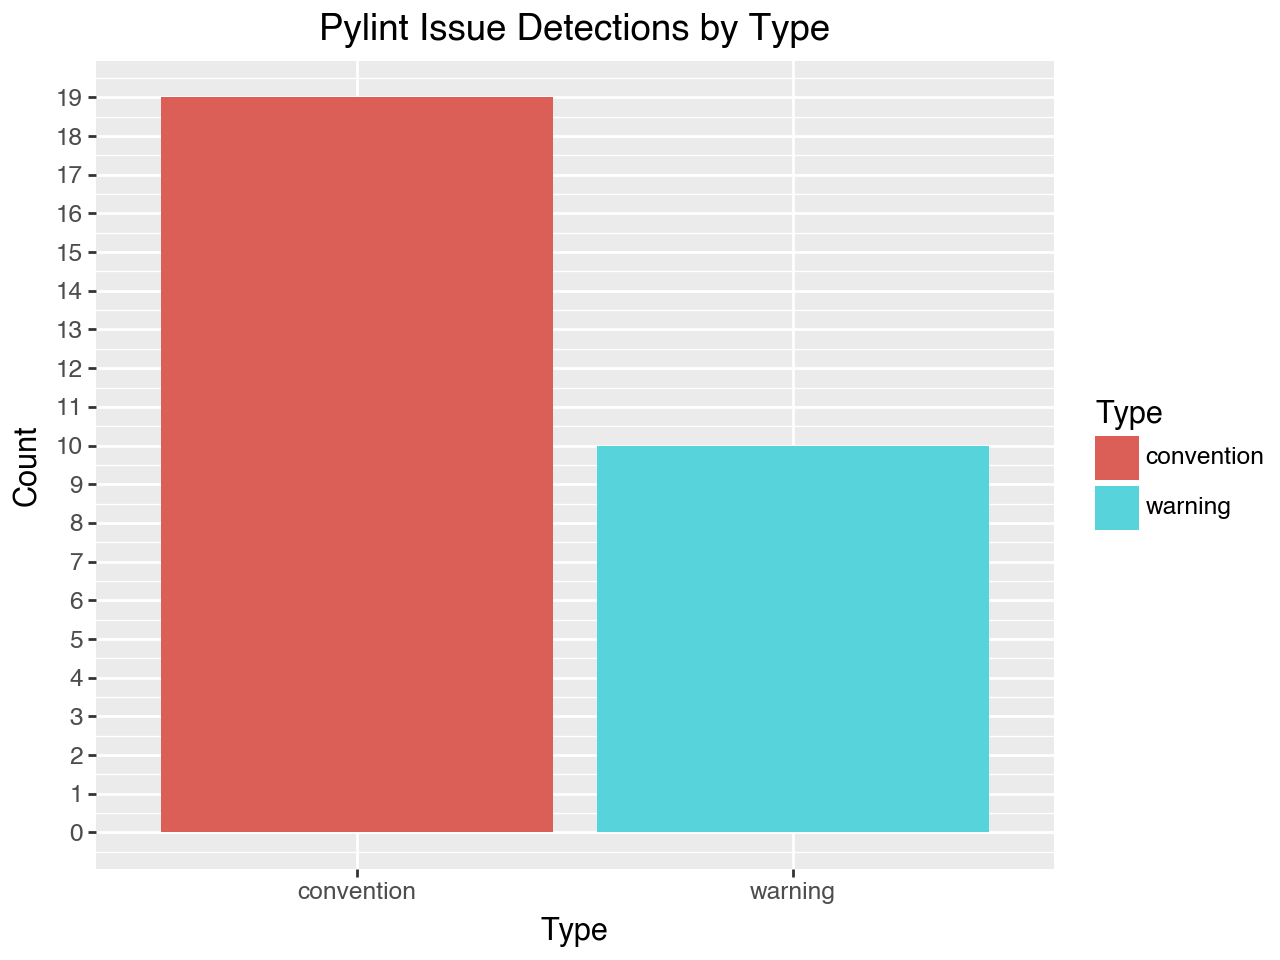

In [5]:
type_summary_df = (
    static_analysis_df
    .group_by("type")
    .agg(pl.len().alias("Count"))
)

type_distribution_plt = (
    ggplot(type_summary_df, aes(x="type", y="Count", fill="type"))
    + geom_col()
    # + theme_linedraw()
    + scale_y_continuous(breaks=range(0, max(type_summary_df['Count']) + 2, 1))
    + labs(
        title="Pylint Issue Detections by Type",
        x="Type", 
        y="Count", 
        fill="Type",
    )
)

type_distribution_plt.show()

## Issues by Module

In [6]:
static_analysis_df["module"].unique()

module
str
"""LouiesBurner"""
"""LouiesBurner.scraping"""
"""LouiesBurner.x"""
"""LouiesBurner.utils"""
"""LouiesBurner.schedule"""
"""wmns_soccer"""


/var/folders/2_/kwjd2wv14q91l3mg7r83n04c0000gn/T/ipykernel_79563/3621603785.py:8: DeprecationWarning: `DataFrame.melt` is deprecated. Use `unpivot` instead, with `index` instead of `id_vars` and `on` instead of `value_vars`


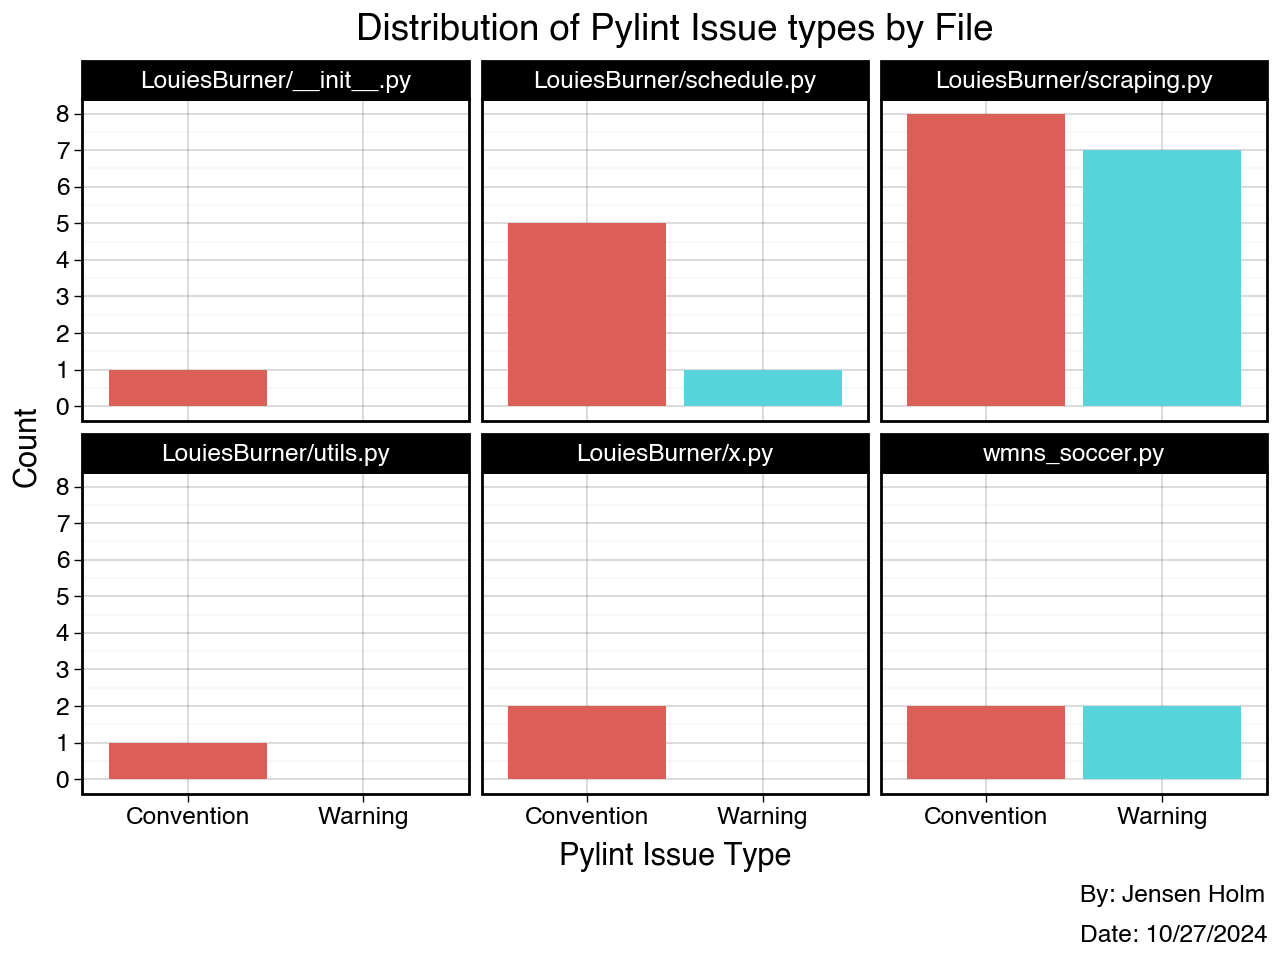

In [15]:
module_issue_summary_df = (
    static_analysis_df
   .group_by("path")
   .agg(
        pl.col("type").filter(pl.col("type") == "convention").len().alias("Convention"),
        pl.col("type").filter(pl.col("type") == "warning").len().alias("Warning"),
    )
    .melt(
        id_vars="path",
        value_vars=["Convention", "Warning"],
        variable_name="type",
        value_name="count",
    )
)

module_issue_plot = (
    ggplot(
        module_issue_summary_df,
        aes(x="type", y="count", fill="type")
    )
    + geom_col()
    + facet_wrap("~ path")
    + guides(fill=False)
    + theme_linedraw()
    + scale_y_continuous(breaks=range(0, max(module_issue_summary_df["count"]) + 2, 1))
    + labs(
        title="Distribution of Pylint Issue types by File",
        x="Pylint Issue Type",
        y="Count",
        caption="By: Jensen Holm\n\nDate: 10/27/2024"
    )
)

module_issue_plot

In [8]:
# so we can see the entire table
pl.Config.set_tbl_rows(-1)
pl.Config.set_tbl_width_chars(1000)  # Adjust the width as needed
pl.Config.set_fmt_str_lengths(100)

(static_analysis_df
    .select("path", "message"))

path,message
str,str
"""LouiesBurner/__init__.py""","""Module name ""LouiesBurner"" doesn't conform to snake_case naming style"""
"""LouiesBurner/x.py""","""Missing module docstring"""
"""LouiesBurner/x.py""","""standard import ""os"" should be placed before third party import ""tweepy.API"""""
"""LouiesBurner/utils.py""","""Missing module docstring"""
"""LouiesBurner/schedule.py""","""Trailing whitespace"""
"""LouiesBurner/schedule.py""","""Line too long (126/100)"""
"""LouiesBurner/schedule.py""","""Trailing newlines"""
"""LouiesBurner/schedule.py""","""Missing module docstring"""
"""LouiesBurner/schedule.py""","""standard import ""datetime.datetime"" should be placed before third party imports ""requests"", ""bs4.Bea…"
